In [18]:
%matplotlib inline
import pandas as pd
import xarray as xr
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [19]:
def nc_to_df(netcdf_file):
    """
    Helper function to load .nc file into pandas dataframe.
    """
    ds = xr.open_dataset(netcdf_file)
    df = ds.to_dataframe()
    # remove lat, lon from index
    df = df.reset_index([0, 1])
    df = df.replace(-9999, np.nan)
    return df

In [20]:
def concat_data(data_path, pattern):
    """
    Helper function to merge .nc file into one pandas dataframe.
    """
    data = pd.DataFrame()
    for f in data_path.glob(pattern):
        df = nc_to_df(f)
        data = pd.concat([data, df], sort=False)
    return data.sort_index()

In [21]:
data_path = Path(r'C:\dan\dev\OzFlux_scripts\data')
data = concat_data(data_path, '*L6.nc*')

C:\ProgramData\Miniconda3\lib\site-packages\xarray\coding\variables.py:138: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
C:\ProgramData\Miniconda3\lib\site-packages\xarray\coding\variables.py:138: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
C:\ProgramData\Miniconda3\lib\site-packages\xarray\coding\variables.py:138: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


In [22]:
def plot_minmaxmean(data, window, outfile=None):
    """
    Function to plot time series of daily min, max and mean VPD and Ta.
    """
    fig, (ax1, ax2) = plt.subplots(figsize=(8, 6), nrows=2, sharex=True)

    ax1.plot(data['VPD'].resample('d').min(), 'b-', lw=1, alpha=.3, label='')
    ax1.plot(data['VPD'].resample('d').min().rolling(
        window).mean(), 'b-', lw=1, label='min')
    ax1.plot(data['VPD'].resample('d').max(), 'r-', lw=1, alpha=.3, label='')
    ax1.plot(data['VPD'].resample('d').max().rolling(
        window).mean(), 'r-', lw=1, label='max')
    ax1.plot(data['VPD'].resample('d').mean(), 'k-', lw=1, alpha=.3, label='')
    ax1.plot(data['VPD'].resample('d').mean().rolling(
        window).mean(), 'k-', lw=1, label='mean')
    ax1.legend(loc='upper left', ncol=3)
    ax1.set_ylabel(u'VPD (kPa)')

    ax2.plot(data['Ta'].resample('d').min(), 'b-', lw=1, alpha=.3, label='')
    ax2.plot(data['Ta'].resample('d').min().rolling(
        window).mean(), 'b-', lw=1, label='min')
    ax2.plot(data['Ta'].resample('d').max(), 'r-', lw=1, alpha=.3, label='')
    ax2.plot(data['Ta'].resample('d').max().rolling(
        window).mean(), 'r-', lw=1, label='max')
    ax2.plot(data['Ta'].resample('d').mean(), 'k-', lw=1, alpha=.3, label='')
    ax2.plot(data['Ta'].resample('d').mean().rolling(
        window).mean(), 'k-', lw=1, label='mean')
    ax2.legend(loc='upper left', ncol=3)
    ax2.set_ylabel(u'Air temperature (℃)')

    plt.tight_layout()
    plt.show()

    if outfile:
        plt.savefig(outfile, dpi=300, bbox_inches='tight')

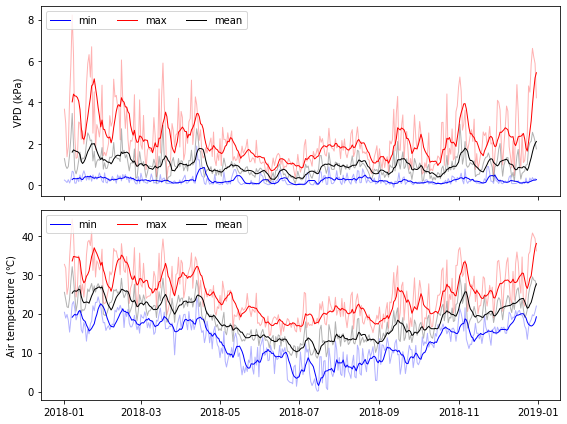

In [23]:
plot_minmaxmean(data, 7)